In [2]:
!pip install matplotlib

  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl.metadata (9.2 kB)
Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.

In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
dataset=pd.read_csv("Preprocessed_car_predict.csv")

In [9]:
dataset

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,23,50,2016,183903,173,1,1,2,5,1,2,5,2,0,0,1,9,20433.666667,0.040054,7208.52
1,14,77,2010,236643,352,1,2,1,5,4,0,5,1,0,2,2,15,15776.200000,0.039921,6911.81
2,20,27,2016,103199,188,0,0,0,5,4,0,5,2,0,0,5,9,11466.555556,0.040230,11915.63
3,3,51,2016,118889,338,1,2,0,4,0,3,3,2,1,2,0,9,13209.888889,0.039847,25984.79
4,22,46,2018,204170,196,1,0,1,5,3,2,5,1,0,0,4,7,29167.142857,0.039627,8151.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,11,23,2015,130407,176,1,1,1,4,3,1,2,2,0,0,5,10,13040.700000,0.040006,10928.88
999996,6,21,2013,276316,211,1,2,2,0,3,0,4,1,0,2,4,12,23026.333333,0.040035,1827.22
999997,16,31,2023,3964,339,0,1,0,4,5,2,2,2,0,2,4,2,1982.000000,0.039794,48882.42
999998,24,102,2019,83674,311,0,2,0,6,1,0,2,2,0,0,3,6,13945.666667,0.039842,32195.91


In [10]:
def quanqual(dataset):
    quan=[]
    qual=[]
    for columnname in dataset.columns:
        if(dataset[columnname].dtype=='O'):
            #print("qual")
            qual.append(columnname)
        else:
            #print("quan")
            quan.append(columnname)
    return quan,qual

In [14]:
quan,qual=quanqual(dataset)

In [15]:
quan

['make',
 'model',
 'year',
 'mileage',
 'engine_hp',
 'transmission',
 'fuel_type',
 'drivetrain',
 'body_type',
 'exterior_color',
 'interior_color',
 'owner_count',
 'accident_history',
 'seller_type',
 'condition',
 'trim',
 'vehicle_age',
 'mileage_per_year',
 'brand_popularity',
 'price']

In [16]:
#Initialize table
rows=['Mean','Median','Mode','Q1-25%','Q2-50%','Q3-75%','Q4-100%','IQR','Min','Max','Lesser','Greater','Kurtosis','Skew','Var','Std']
descriptive=pd.DataFrame(index=rows, columns=quan)

In [18]:
#Finding Outliers
Lesser=[]
Greater=[]
for columnname in quan:
    if(descriptive[columnname]['Min']<descriptive[columnname]["Lesser"]):
        Lesser.append(columnname)
    if(descriptive[columnname]['Max']>descriptive[columnname]["Greater"]):
        Greater.append(columnname)

In [23]:
#Univariate
def Univariate(dataset, quan):
    rows=['Mean','Median','Mode','Q1-25%','Q2-50%','Q3-75%','Q4-100%','IQR','Min','Max','Lesser','Greater','Kurtosis','Skew','Var','Std']
    descriptive=pd.DataFrame(index=rows, columns=quan)
    for columnname in quan:
        descriptive.loc['Mean',columnname]=dataset[columnname].mean()
        descriptive.loc['Median',columnname]=dataset[columnname].median()
        descriptive.loc['Mode',columnname]=dataset[columnname].mode()[0]

        q1=dataset[columnname].quantile(0.25)
        q2=dataset[columnname].quantile(0.50)
        q3=dataset[columnname].quantile(0.75)
        q4=dataset[columnname].quantile(1.00)

        descriptive.loc['Q1-25%',columnname]=q1
        descriptive.loc['Q2-50%',columnname]=q2
        descriptive.loc['Q3-75%',columnname]=q3
        descriptive.loc['Q4-100%',columnname]=q4

        iqr=q3-q1
        descriptive.loc['IQR',columnname]=iqr
        descriptive.loc['Min',columnname]=dataset[columnname].min()
        descriptive.loc['Max',columnname]=dataset[columnname].max()

        descriptive.loc['Lesser',columnname]=q1-1.5*iqr
        descriptive.loc['Greater',columnname]=q3+1.5*iqr

        descriptive.loc['Kurtosis',columnname]=dataset[columnname].kurtosis()
        descriptive.loc['Skew',columnname]=dataset[columnname].skew()
        descriptive.loc['Var',columnname]=dataset[columnname].var()
        descriptive.loc['Std',columnname]=dataset[columnname].std()
    return descriptive
        


In [24]:
descriptive=Univariate(dataset,quan)

In [25]:
descriptive

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
Mean,12.005694,50.634468,2017.453816,112660.126464,235.664301,0.499737,0.999497,0.957638,3.754114,2.502274,1.499152,3.477846,1.700247,0.30029,1.09931,2.499507,7.585987,14540.6742,0.040001,20329.302593
Median,12.0,51.0,2018.0,103331.0,215.0,0.0,1.0,1.0,4.0,3.0,1.0,4.0,2.0,0.0,1.0,3.0,7.0,14688.118056,0.040022,17864.74
Mode,12,3,2017,300000,90,0,1,0,4,5,0,5,2,0,2,3,8,500.0,0.039842,1500.0
Q1-25%,6.0,24.0,2015.0,57654.0,162.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,5.0,10487.633523,0.039842,10324.5275
Q2-50%,12.0,51.0,2018.0,103331.0,215.0,0.0,1.0,1.0,4.0,3.0,1.0,4.0,2.0,0.0,1.0,3.0,7.0,14688.118056,0.040022,17864.74
Q3-75%,18.0,77.0,2020.0,157865.0,300.0,1.0,2.0,2.0,5.0,4.0,3.0,5.0,2.0,1.0,2.0,4.0,10.0,18685.942308,0.040148,27601.4025
Q4-100%,24.0,104.0,2025.0,300000.0,581.0,1.0,2.0,2.0,6.0,5.0,3.0,5.0,2.0,1.0,2.0,5.0,25.0,55391.0,0.040484,93422.09
IQR,12.0,53.0,5.0,100211.0,138.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,0.0,1.0,2.0,3.0,5.0,8198.308785,0.000306,17276.875
Min,0,0,2000,500,90,0,0,0,0,0,0,1,0,0,0,0,1,33.333333,0.039318,1500.0
Max,24,104,2025,300000,581,1,2,2,6,5,3,5,2,1,2,5,25,55391.0,0.040484,93422.09


In [26]:
dataset.cov()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
make,51.986472,7.801331,4.008201e-02,-4.863730e+02,-1.265676,1.631499e-03,-8.102144e-03,-0.326741,1.192167,-1.142596e-02,2.828288e-04,-2.415088e-02,-1.205208e-03,-3.689855e-03,1.010530e-03,-9.621202e-03,-3.797965e-02,-2.097129e+00,2.293311e-04,1.783699e+02
model,7.801331,941.454080,-5.371478e-02,2.354794e+03,-85.950172,1.663388e-02,-1.223587e-02,0.208549,7.678444,7.946430e-02,3.208906e-02,-8.133004e-03,3.257690e-03,-2.462042e-02,-5.837023e-03,4.338084e-02,5.303405e-02,2.064098e+02,-9.440146e-04,-8.676117e+03
year,0.040082,-0.053715,1.522783e+01,-2.205543e+05,0.049239,7.053543e-04,-2.608733e-03,0.002574,0.002428,2.403025e-03,1.081837e-03,-3.912500e+00,1.693709e-03,-3.414070e-04,-4.904675e-04,6.347738e-03,-1.492747e+01,-2.772880e+03,-9.062904e-08,3.539329e+04
mileage,-486.372994,2354.794328,-2.205543e+05,5.196714e+09,75.670633,-3.529763e+01,1.376022e+01,30.129506,-61.161916,-4.801979e+01,-7.386111e+00,5.723408e+04,-1.033237e+01,-1.173965e+01,8.403685e+01,-7.226945e+01,2.162308e+05,2.654986e+08,-1.462681e-02,-6.082116e+08
engine_hp,-1.265676,-85.950172,4.923863e-02,7.567063e+01,8763.725809,7.916829e-02,4.779148e-03,2.873722,-1.224756,2.370531e-01,1.458820e-01,5.948148e-02,-6.762785e-02,-3.789099e-02,7.327734e-02,-1.071001e-03,-5.113480e-02,-9.214119e+01,1.694357e-03,8.345252e+05
transmission,0.001631,0.016634,7.053543e-04,-3.529763e+01,0.079168,2.500002e-01,-2.076325e-04,-0.000331,0.000484,7.860988e-04,7.327705e-05,-1.183328e-03,-5.123356e-04,2.759765e-04,2.111187e-04,3.268707e-04,-6.123860e-04,-1.939976e+00,-5.483203e-08,9.475077e+00
fuel_type,-0.008102,-0.012236,-2.608733e-03,1.376022e+01,0.004779,-2.076325e-04,6.404034e-01,-0.000174,-0.001405,-6.513568e-04,-1.972929e-03,8.223574e-04,-8.007766e-04,2.920462e-04,-1.303048e-03,1.178253e-03,2.512754e-03,-3.301978e+00,-2.151317e-07,-7.183791e+00
drivetrain,-0.326741,0.208549,2.573556e-03,3.012951e+01,2.873722,-3.311415e-04,-1.743083e-04,0.678064,-0.029934,-1.136670e-03,-1.650925e-03,-5.248780e-05,7.586349e-05,-4.221154e-04,1.356972e-03,-1.661886e-03,-2.331421e-03,7.821914e+00,-9.103176e-06,2.965627e+02
body_type,1.192167,7.678444,2.428003e-03,-6.116192e+01,-1.224756,4.843325e-04,-1.404682e-03,-0.029934,2.182676,2.396147e-03,1.064490e-03,3.596419e-04,1.652935e-03,-9.589316e-05,-1.582063e-03,-2.196224e-03,-2.325003e-03,-1.156125e+01,-1.973929e-06,-9.467871e+01
exterior_color,-0.011426,0.079464,2.403025e-03,-4.801979e+01,0.237053,7.860988e-04,-6.513568e-04,-0.001137,0.002396,2.915516e+00,1.678930e-03,-1.090623e-03,-3.928621e-04,8.011413e-04,4.581695e-04,-6.643796e-04,-2.024036e-03,-6.140195e+00,-8.776994e-07,2.690460e+01


In [27]:
dataset.corr()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
make,1.000000,0.035263,0.001425,-0.000936,-0.001875,0.000453,-0.001404,-0.055033,0.111917,-0.000928,0.000035,-0.002168,-0.000300,-0.001116,0.000149,-0.000782,-0.001375,-0.000048,0.136022,0.001813
model,0.035263,1.000000,-0.000449,0.001065,-0.029923,0.001084,-0.000498,0.008254,0.169387,0.001517,0.000935,-0.000172,0.000191,-0.001751,-0.000202,0.000828,0.000451,0.001101,-0.131574,-0.020724
year,0.001425,-0.000449,1.000000,-0.784029,0.000135,0.000362,-0.000835,0.000801,0.000421,0.000361,0.000248,-0.649004,0.000780,-0.000191,-0.000133,0.000953,-0.998898,-0.116319,-0.000099,0.664730
mileage,-0.000936,0.001065,-0.784029,1.000000,0.000011,-0.000979,0.000239,0.000508,-0.000574,-0.000390,-0.000092,0.513928,-0.000258,-0.000355,0.001236,-0.000587,0.783262,0.602885,-0.000868,-0.618349
engine_hp,-0.001875,-0.029923,0.000135,0.000011,1.000000,0.001691,0.000064,0.037279,-0.008855,0.001483,0.001393,0.000411,-0.001298,-0.000883,0.000830,-0.000007,-0.000143,-0.000161,0.077402,0.653339
transmission,0.000453,0.001084,0.000362,-0.000979,0.001691,1.000000,-0.000519,-0.000804,0.000656,0.000921,0.000131,-0.001532,-0.001841,0.001204,0.000448,0.000383,-0.000320,-0.000635,-0.000469,0.001389
fuel_type,-0.001404,-0.000498,-0.000835,0.000239,0.000064,-0.000519,1.000000,-0.000265,-0.001188,-0.000477,-0.002204,0.000665,-0.001798,0.000796,-0.001726,0.000862,0.000820,-0.000675,-0.001150,-0.000658
drivetrain,-0.055033,0.008254,0.000801,0.000508,0.037279,-0.000804,-0.000265,1.000000,-0.024606,-0.000808,-0.001792,-0.000041,0.000166,-0.001118,0.001747,-0.001182,-0.000739,0.001555,-0.047277,0.026395
body_type,0.111917,0.169387,0.000421,-0.000574,-0.008855,0.000656,-0.001188,-0.024606,1.000000,0.000950,0.000644,0.000158,0.002011,-0.000142,-0.001135,-0.000871,-0.000411,-0.001281,-0.005714,-0.004697
exterior_color,-0.000928,0.001517,0.000361,-0.000390,0.001483,0.000921,-0.000477,-0.000808,0.000950,1.000000,0.000879,-0.000413,-0.000413,0.001024,0.000284,-0.000228,-0.000310,-0.000589,-0.002198,0.001155


In [38]:
dataset=pd.read_csv("car_price_prediction.csv")

['Diesel' 'Electric' 'Gasoline']


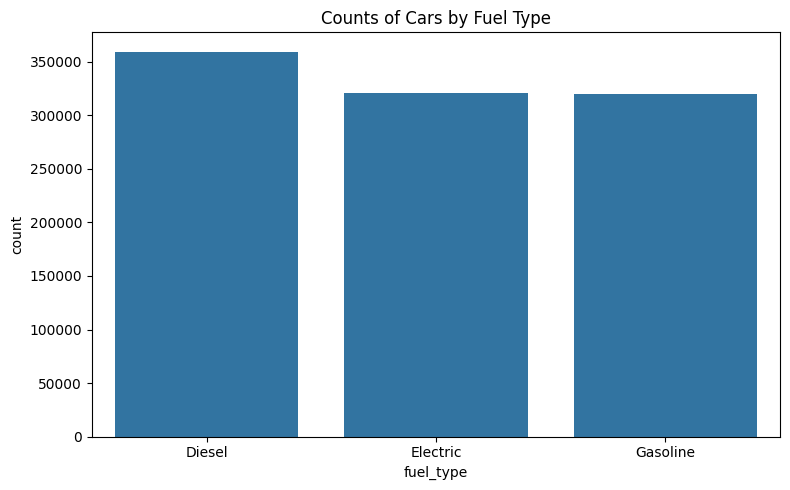

In [39]:
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(8, 5))
sns.countplot(x='fuel_type', data=dataset, order=dataset['fuel_type'].value_counts().index)
le = LabelEncoder()
dataset['fuel_type_encoded'] = le.fit_transform(dataset['fuel_type'])

print(le.classes_)  

# replace numeric ticks with names
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_)

plt.title('Counts of Cars by Fuel Type')
plt.tight_layout()
plt.show()


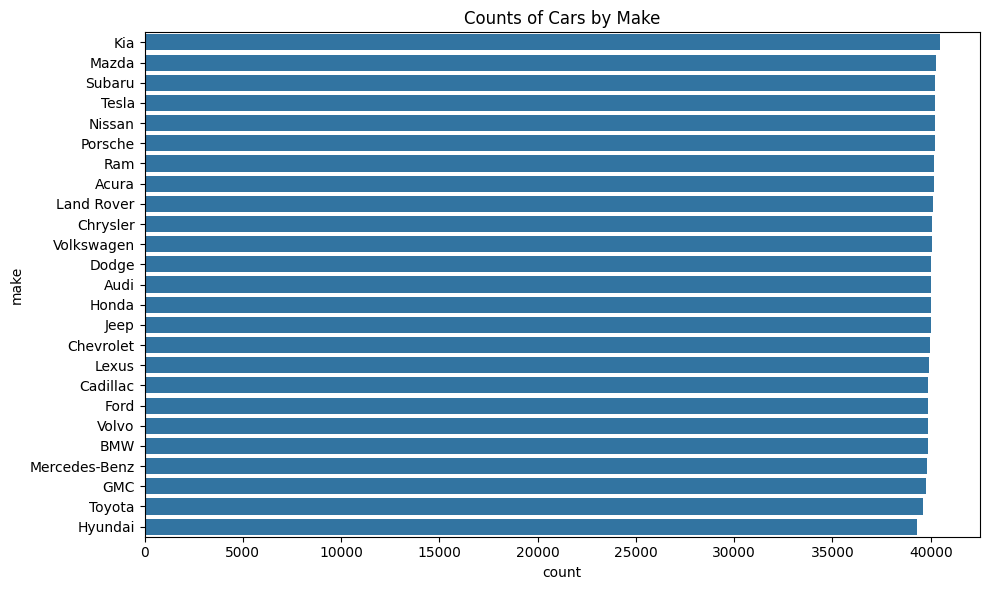

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=dataset, order=dataset['make'].value_counts().index)
plt.title('Counts of Cars by Make')
plt.tight_layout()
plt.show()

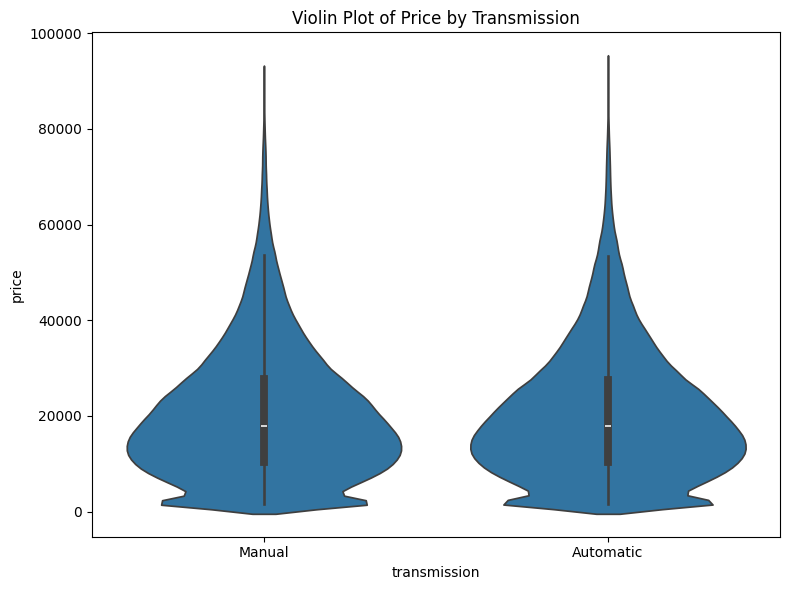

In [44]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='transmission', y='price', data=dataset)
plt.title('Violin Plot of Price by Transmission')
plt.tight_layout()
plt.show()